# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


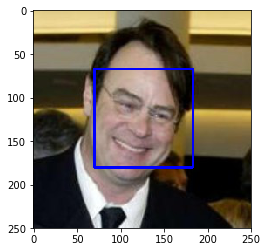

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
98% human faces are detected as human faces. <br>
While 17% dog faces are detected as human faces. So 83% dog faces are correctly classified.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
h_acc= np.array([face_detector(h_file) for h_file in human_files_short]).sum()
d_acc= np.array([face_detector(d_file) for d_file in dog_files_short]).sum()
print(h_acc)
print(d_acc)


98
17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
face_cascade2 = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

def face_detector2(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade2.detectMultiScale(gray)
    return len(faces) > 0

In [6]:
h_acc= np.array([face_detector2(h_file) for h_file in human_files_short]).sum()
d_acc= np.array([face_detector2(d_file) for d_file in dog_files_short]).sum()
print(h_acc)
print(100 - d_acc)

98
83


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
print(use_cuda)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 105135064.54it/s]


True


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image= Image.open(img_path)
    image= image.resize((224,224))
    img= transforms.functional.to_tensor(image)
    img= torch.unsqueeze(img, 0)
    if use_cuda:
        img= img.cuda()
    #print(img.shape)
    prediction= VGG16(img)
    if use_cuda:
        idx= prediction.detach().cpu().numpy().argmax(axis=1)
    else:
        idx= prediction.detach().numpy().argmax(axis=1)
    
    return idx # predicted class index
    

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    idx= VGG16_predict(img_path)
    
    return 151 <= idx <= 268

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ <br>
0% of human files are detected as dog. <br>
94% of dog files are detected as dog. <br>


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
hum_as_dog= np.array([dog_detector(human) for human in human_files_short])
acc1= hum_as_dog.sum() / len(hum_as_dog)
print(acc1 * 100)

dog_as_dog= np.array([dog_detector(dog) for dog in dog_files_short])
acc2= dog_as_dog.sum() / len(dog_as_dog)
print(acc2 * 100)

0.0
94.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### Trying dog detection with inception model

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
inception= models.inception_v3(pretrained=True)
#inception.requires_grad_(False)

def inception_predict(img_path):
    img= Image.open(img_path)
    img= img.resize((299, 299))
    img= transforms.functional.to_tensor(img)
    img= torch.unsqueeze(img, 0)
    #print(img.shape)
    inception.eval()
    with torch.no_grad():
        pred= inception(img).detach().numpy()
    idx= pred.argmax(axis= 1)
    return idx

def is_dog(img_path):
    idx= inception_predict(img_path)
    return 151 <= idx <= 268




Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:04<00:00, 25639047.24it/s]


In [12]:
acc1= np.array([is_dog(human) for human in human_files_short ]).sum()
acc2= np.array([is_dog(dog) for dog in dog_files_short ]).sum()

print(100 - acc1)
print(acc2)

100
99


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
from torch.utils.data import DataLoader
import os
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

transforms_train= transforms.Compose([ transforms.RandomHorizontalFlip(p= 0.25),
                                      transforms.Resize((300,300)),
                                transforms.RandomRotation(30),
                               transforms.RandomCrop(255, pad_if_needed=True),
                               transforms.ToTensor(),
                               #transforms.Normalize([0.5, 0.5,0.5], [0.5,0.5,0.5]),
                               ])

transforms_other= transforms.Compose([
                               transforms.Resize((255,255)),
                               transforms.ToTensor(),
                               #transforms.Normalize([0.5, 0.5,0.5], [0.5,0.5,0.5]),
                               ])

batch_size= 16

datadir= "/data/dog_images"
train_dir= os.path.join(datadir, "train")
test_dir=  os.path.join(datadir, "test")
val_dir= os.path.join(datadir, "valid")


train_dataset= datasets.ImageFolder(train_dir, transform= transforms_train)
test_dataset= datasets.ImageFolder(test_dir, transform= transforms_other)
val_dataset= datasets.ImageFolder(val_dir, transform= transforms_other)

train_loader= DataLoader(train_dataset, batch_size= batch_size, shuffle= True)
test_loader= DataLoader(test_dataset, batch_size= batch_size, shuffle= True)
val_loader= DataLoader(val_dataset, batch_size= batch_size, shuffle= True)

loaders={}
loaders['train']= train_loader
loaders['test']= test_loader
loaders['valid']= val_loader

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: <br>
- I choose (255 x 255) as image size for input. As we have seen earlier with the best COnv Nets the input images sizes are 224 (ResNet) to 299 (InceptionV3). So with that dimension and with proper use of conv layers I can achive the desied accuracy. That was the though process the reason for keeping 255 is that with proper padding later the shape becomes 2^x format like the output of each conv layer was 128 x 128, 64 x 64 and so on. 
- Yes I have used augmentation I feel 8192 images are not enough to train, I have first resized the picture a little bigger (300 x 300) and then used randomCrop in addition with horizontalFlip and RandomRotation for training DataLoaders

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

use_cuda= torch.cuda.is_available()

# define the CNN architecture
class Net1(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net1, self).__init__()
        ## Define layers of a CNN
        self.conv1= nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1, stride= 2)
        self.conv2= nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride= 2)
        self.conv3= nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride= 2)
        self.conv4= nn.Conv2d(in_channels=96, out_channels=48, kernel_size=3, padding=1)
        self.conv5= nn.Conv2d(in_channels=48, out_channels=32, kernel_size=3, padding=1)
        
        self.batchnorm1= nn.BatchNorm2d(32)
        self.batchnorm2= nn.BatchNorm2d(64)
        self.batchnorm3= nn.BatchNorm2d(128)
        
        self.pool= nn.MaxPool2d(2)
        self.dropout1= nn.Dropout(p= 0.3)
        self.dropout2= nn.Dropout(p= 0.2)
        
        self.linear1= nn.Linear(8192, 1000)
        self.linear2= nn.Linear(1000, 300)
        self.linear3= nn.Linear(300, 133)
    
    def forward(self, x):
        ## Define forward behavior
        x= self.conv1(x)
        x= F.leaky_relu(x)
        x= self.pool(x)
        #x= self.batchnorm1(x)
        
        x= self.conv2(x)
        x= F.leaky_relu(x)
        x= self.pool(x)
        #x= self.batchnorm2(x)
        
        x= self.conv3(x)
        x= F.leaky_relu(x)
        #x= self.batchnorm3(x)
        #x= self.pool(x)

        shape_= x.shape
        
        x= x.view(shape_[0], shape_[1] * shape_[2] * shape_[3])
        x= F.relu(self.linear1(x))
        x= self.dropout1(x)
        
        x= F.relu(self.linear2(x))
        x= self.dropout2(x)
        
        x= F.relu(self.linear3(x))
        #x= F.softmax(x, dim= 1)
            
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch9 = Net1()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch9.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ <br>
__Fixing the architecture:__ I had used 5 conv layers at first but no significance imporvement over training loss. So I reduced it to 3 but after that the output of 3rd conv net was not sqashed to smaller height and width so the number of parameters in fully connected layers were too much. <br>
To get over this I used stride of 2 in those 3 conv layers to get smaller ouptut dimension. Still I didn't see much improvement in training. So I checked the output tensor for an Image and almost all the values were 0. The problem was __dying ReLUs__ and there were multiple reasons, the main reason was I was unware that ToTensor returns values between 0 and 1, I though it must return pixel intensities in a range of (0 , 255) for that reason I was Normalizing as part of transform and most of the values were in negetives and ReLU function was removing those. So I removed the Normalization and also added LeakyReLU, and after trying out some loss functions, optimizers and learning rate combinations I got 11% accuracy, FINALLY

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [15]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch9.parameters(), lr= 0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [6]:
# the following import is required for training to be robust to truncated images
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            optimizer_scratch.zero_grad()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            outputs= model(data)
            loss= criterion_scratch(outputs, target)
            #train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss += loss.item()
            loss.backward()
            optimizer_scratch.step()
        
        train_loss=  train_loss / len(loaders['train'])
        #print(train_loss)
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            outputs= model(data)
            loss= criterion_scratch(outputs, target)
            #valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            valid_loss += loss.item()
            
        valid_loss = valid_loss / len(loaders['valid'])
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            #torch.save(model.)
            valid_loss_min= valid_loss
            
    # return trained model
    return model


# train the model
model_scratch9 = train(30, loaders, model_scratch9, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch9.load_state_dict(torch.load('model_scratch.pt'))
#model_scratch.state_dict()

Epoch: 1 	Training Loss: 4.889061 	Validation Loss: 4.884396
Epoch: 2 	Training Loss: 4.883653 	Validation Loss: 4.875290
Epoch: 3 	Training Loss: 4.845612 	Validation Loss: 4.830142
Epoch: 4 	Training Loss: 4.779550 	Validation Loss: 4.759408
Epoch: 5 	Training Loss: 4.728668 	Validation Loss: 4.718945
Epoch: 6 	Training Loss: 4.688443 	Validation Loss: 4.677374
Epoch: 7 	Training Loss: 4.633755 	Validation Loss: 4.590645
Epoch: 8 	Training Loss: 4.558339 	Validation Loss: 4.557777
Epoch: 9 	Training Loss: 4.485987 	Validation Loss: 4.392083
Epoch: 10 	Training Loss: 4.396428 	Validation Loss: 4.575160
Epoch: 11 	Training Loss: 4.311610 	Validation Loss: 4.264208
Epoch: 12 	Training Loss: 4.253196 	Validation Loss: 4.867773
Epoch: 13 	Training Loss: 4.187597 	Validation Loss: 4.161448
Epoch: 14 	Training Loss: 4.122421 	Validation Loss: 4.173898
Epoch: 15 	Training Loss: 4.052065 	Validation Loss: 4.397426
Epoch: 16 	Training Loss: 3.992691 	Validation Loss: 4.233202
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [16]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

model_scratch9.load_state_dict(torch.load('model_scratch.pt'))
# call test function    
test(loaders, model_scratch9, criterion_scratch, use_cuda)

Test Loss: 3.777783


Test Accuracy: 11% (96/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [13]:
## TODO: Specify data loaders
from torch.utils.data import DataLoader
import os
from torchvision import datasets, transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

transforms_train= transforms.Compose([ transforms.RandomHorizontalFlip(p= 0.25),
                                      transforms.Resize((350,350)),
                                transforms.RandomRotation(30),
                               transforms.RandomCrop(299, pad_if_needed=True),
                               transforms.ToTensor(),
                               #transforms.Normalize([0.5, 0.5,0.5], [0.5,0.5,0.5]),
                               ])

transforms_other= transforms.Compose([
                               transforms.Resize((299,299)),
                               transforms.ToTensor(),
                               #transforms.Normalize([0.5, 0.5,0.5], [0.5,0.5,0.5]),
                               ])

batch_size= 16

datadir= "/data/dog_images"
train_dir= os.path.join(datadir, "train")
test_dir=  os.path.join(datadir, "test")
val_dir= os.path.join(datadir, "valid")


train_dataset= datasets.ImageFolder(train_dir, transform= transforms_train)
test_dataset= datasets.ImageFolder(test_dir, transform= transforms_other)
val_dataset= datasets.ImageFolder(val_dir, transform= transforms_other)

train_loader= DataLoader(train_dataset, batch_size= batch_size, shuffle= True)
test_loader= DataLoader(test_dataset, batch_size= batch_size, shuffle= True)
val_loader= DataLoader(val_dataset, batch_size= batch_size, shuffle= True)

loaders_transfer={}
loaders_transfer['train']= train_loader
loaders_transfer['test']= test_loader
loaders_transfer['valid']= val_loader

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [14]:
import torchvision.models as models
import torch.nn as nn
import torch 

use_cuda= torch.cuda.is_available()
## TODO: Specify model architecture 
classifier= nn.Sequential(
    nn.Linear(2048, 1000),
    nn.ReLU(),
    nn.Dropout(p= 0.3),
    
    nn.Linear(1000, 500),
    nn.ReLU(),
    nn.Dropout(p= 0.25),
    
    nn.Linear(500, 133),
    #nn.LogSoftmax(dim=1)
    )


model_transfer= models.inception_v3(pretrained= True)
for para in model_transfer.parameters():
    para.requires_grad= False
    
model_transfer.fc= classifier

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ <br>
To achieve 60% accuracy I think any benchmark Convolution Network (with transfer learning) is very much possible. I have used ResNet in a personal netbook earlier. In this notebook I have used VGG16 and InceptionV3 for dog detection in a picture. Compared to 94% accuracy of VGG16 InceptionV3 has accuracy of 99% which is significantly more. <br>
So I have used InceptionV3 once more (as it extracts features better in this case) with 3 fully connected layers and dropouts and it achived 69% accuracy after 4 epoch. As any further experiment was not required.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [18]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr= 0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [16]:
# train the model
import numpy as np

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            optimizer.zero_grad()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            outputs= model(data)
            #print(outputs[0].shape)
            #print(target.shape)
            loss= criterion(outputs[0], target)
            #train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss += loss.item()
            loss.backward()
            optimizer.step()
        
        train_loss=  train_loss / len(loaders['train'])
        #print(train_loss)
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            outputs= model(data)
            #print(outputs[0].shape)
            #print(target.shape)
            loss= criterion(outputs, target)
            #valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            valid_loss += loss.item()
            
        valid_loss = valid_loss / len(loaders['valid'])
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            #torch.save(model.)
            valid_loss_min= valid_loss
            
    # return trained model
    return model

n_epochs= 4
model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.760987 	Validation Loss: 4.214032
Epoch: 2 	Training Loss: 3.135792 	Validation Loss: 1.689777
Epoch: 3 	Training Loss: 1.978932 	Validation Loss: 1.104186
Epoch: 4 	Training Loss: 1.632696 	Validation Loss: 0.924637


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [19]:
model_transfer.load_state_dict(torch.load('model_transfer.pt')) #using the pretrained saved file

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))


test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.982196


Test Accuracy: 69% (580/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [28]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
class_to_idx= loaders_transfer['train'].dataset.class_to_idx
idx_to_class={}
for (cls, idx) in class_to_idx.items():
    idx_to_class[idx]= cls
    
# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    model_transfer.eval()
    img= Image.open(img_path)
    img= img.resize((299, 299))
    img= transforms.functional.to_tensor(img)
    img= torch.unsqueeze(img, 0)
    if torch.cuda.is_available():
        img= img.cuda()
    pred= model_transfer(img).cpu().detach().numpy()
    idx= pred.argmax(axis= 1)
    
    return idx_to_class[idx[0]][4:].replace("_", " ") 

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [29]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from PIL import Image

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img= Image.open(img_path)
    plt.xticks=[]
    plt.yticks=[]
    plt.imshow(img)
   
    plt.show()
    if is_dog(img_path):
        dog_breed= predict_breed_transfer(img_path)
        print("this is {} dog".format(dog_breed))
        
    elif face_detector(img_path):
        dog_breed= predict_breed_transfer(img_path)
        print("This is a human")
        print("Which looks like {} dog".format(dog_breed))
        
    else:
        print("Neither Dog nor Human ditected")
    print("\n"*3)
    

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ <br> 
For dog detection I have used Inception model which has worked better than my expectations. I have tested the model with a tiger and fox image below and it didn't misclassified it as dog and that is impressive because foth are 4 legged furry animal and fox looks similar to some smaller dog breeds. <br>
I am not very much impressed with the human resembling. The grumpy old Trump doesn't look like a australian shepherd, some drooly mastiff would have been a better prediction, that will come under points of improvements.<br>
<br>
__Three Points of Improvement__ <br>

- We can have a seperate model for human resemblence. To predict a dog breed we need to notice it's body shape, fur, tail etc. But for human resemblence we only need face of the human compared to a face of dog. So as there is a human face detector we can create a dataset of dog face from the existing dataset with a help of dog face detector. We can create another model which predicts dog breed from the dog face which need to attain a high accuracy may be 25% accuracy is good enough. Then we can crop only the face part of human image ( so that his clothing or surrounding doesn't affect our presictions) and feed it to our new 2nd model for prediction. I think that would yeild a more reasonable resemblence.<br>

- We certainly need more training data with more variance I was playing with this model in my personal laptop and I used a chocolate labrador puppy image and it predicted some different breed I think for 6680 images for 133 breeds are little less and we need more data with more variations. For example I checked the training images for Labrador Retriver and there are no images of labrador puppies. So with more data and more variation I think the prediction will be better.<br>

- My third point is also regerding the training data. As we are predicting breed of a single dog, not all the dogs in an image I think we need to remove multiple dogs from a single image. As a part of extension of this project if we want to predict breed of all the dogs in an Image then those images with multile dogs of different breeds are fine.

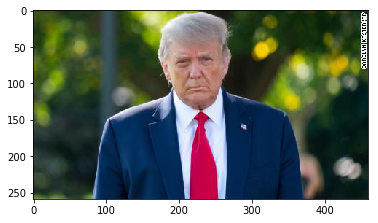

This is a human
Which looks like Australian shepherd dog






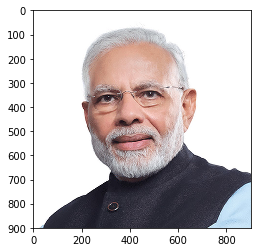

This is a human
Which looks like Irish water spaniel dog






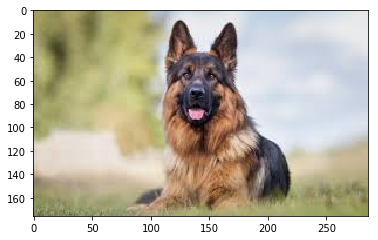

this is German shepherd dog dog






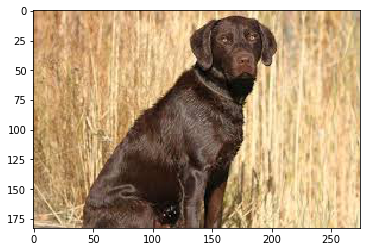

this is Beauceron dog






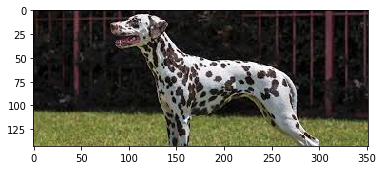

this is Dalmatian dog






In [30]:
from glob import glob
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
thuman_files = np.array(glob("./test_images/humans/*"))
tdog_files = np.array(glob("./test_images/dogs/*"))
## suggested code, below

for file in np.hstack((thuman_files[:3], tdog_files[:3])):
    run_app(file)

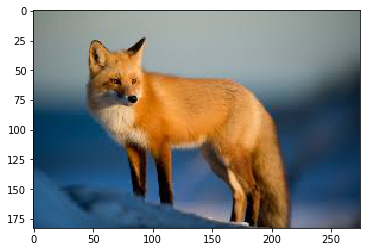

Neither Dog nor Human ditected






In [31]:
run_app("./test_images/fox.jpeg")

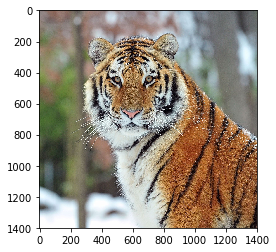

Neither Dog nor Human ditected






In [32]:
run_app("./test_images/tiger.jpg")

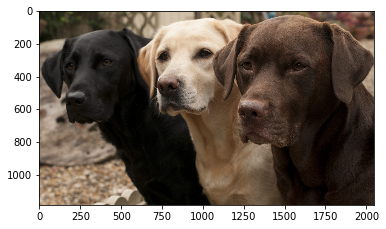

this is Labrador retriever dog






In [33]:
run_app("./test_images/LabradorRetrievers.jpg")

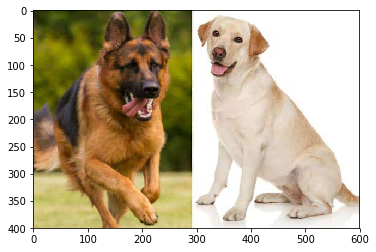

this is German shepherd dog dog






In [34]:
run_app("./test_images/German-Shepherd-Labrador-Mix.jpg")